In [1]:
# Module importieren
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

from scipy.stats import norm

In [2]:
# Daten einlesen in pd

data = pd.read_csv("voice-1636985774.csv")
data.head()
# Selektieren der Spalten
data = data[["meanfreq", "meanfun", "median", "label"]]

# Datawrangling mit der Spalte label
data["label"] = data["label"].map({"male":0, "female":1})
data

,meanfreq,meanfun,median,label
0,0.059781,0.084279,0.032027,0
1,0.066009,0.107937,0.040229,0
2,0.077316,0.098706,0.036718,0
3,0.151228,0.088965,0.158011,0
4,0.135120,0.106398,0.124656,0
...,...,...,...,...
3163,0.131884,0.182790,0.153707,1
3164,0.116221,0.188980,0.076758,1
3165,0.142056,0.209918,0.183731,1
3166,0.143659,0.172375,0.184976,1


In [3]:
# x und y werte definieren
x_meanfreq = data["meanfreq"].values.reshape(-1,1)
x_meanfun = data["meanfun"].values.reshape(-1,1)
x_median = data["median"].values.reshape(-1,1)

y = data["label"].values

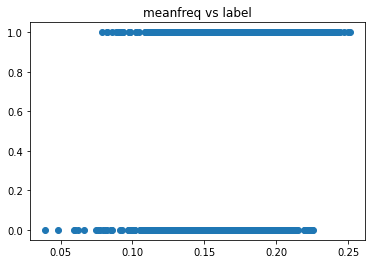

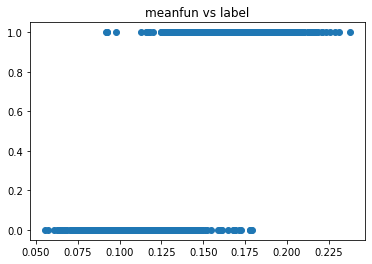

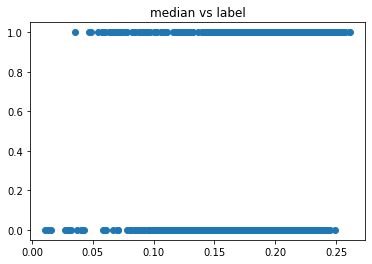

In [4]:
# Scatterplot erstellen
plt.scatter(x_meanfreq, y )
plt.title("meanfreq vs label")
plt.show()

plt.scatter(x_meanfun, y)
plt.title("meanfun vs label")
plt.show()

plt.scatter(x_median, y)
plt.title("median vs label")
plt.show()

In [10]:
# train test daten erstellen
train, test = train_test_split(data, test_size = 0.2)

x_meanfun_train = train["meanfun"].values.reshape(-1,1)
y_meanfun_train = train["label"].values

x_meanfun_test = test["meanfun"].values.reshape(-1,1)
y_meanfun_test = test["label"].values
y_meanfun_train

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [6]:
# Model mit trainignsdaten erstellen
model_meanfun = LogisticRegression().fit(x_meanfun_train, y_meanfun_train)

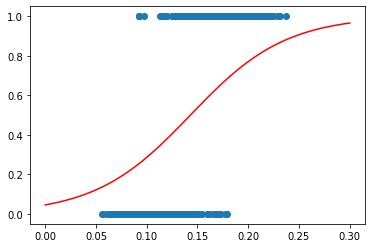

In [7]:
# x_values, und y_values genereiren fuer plot
x_values = np.linspace(0, 0.3, 100).reshape(-1,1)
y_values = model_meanfun.predict_proba(x_values)[:,1]

# plotten
plt.scatter(x_meanfun, y)
plt.plot(x_values, y_values, color = "r")
plt.show()

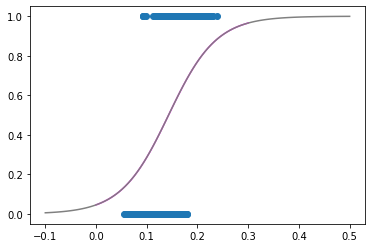

In [8]:
# Alternativ statt predict_proba, mit der Logistischen Funktion
alpha = model_meanfun.coef_
beta = model_meanfun.intercept_
x_values2 = np.linspace(-0.1,0.5,100).reshape(-1,1)
y_values2 = (np.exp(alpha*x_values2+beta)) / (1 + (np.exp(alpha*x_values2+beta)))

# plotten
plt.scatter(x_meanfun, y)
plt.plot(x_values, y_values, color = "fuchsia") # zum testen, ob y_values = y_values2
plt.plot(x_values2, y_values2, color = "grey")
plt.show()

In [9]:
# Confusion Matrix erstellen

y_test_predict = model_meanfun.predict(x_meanfun_test)
conf_matrix = metrics.confusion_matrix(y_meanfun_test, y_test_predict)

print(conf_matrix)

# Auswertung der Conf Matrix

score_conf_M = (conf_matrix[0][0] + conf_matrix[1][1]) / np.sum(conf_matrix)
print(score_conf_M)

score = model_meanfun.score(x_meanfun_test, y_meanfun_test)
print(score)

[[302  11]
 [ 26 295]]
0.9416403785488959
0.9416403785488959
